In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from EOF import EOF
import datetime 
from scipy.interpolate import RectBivariateSpline
from scipy.fftpack import fft,ifft,fftfreq, fftshift

In [2]:
from Dycore import Dycore
def read_all_var(pr_start, pr_to, pr_leap, start, end, internal_day, total_file):
        total_pr = int((pr_to - pr_start) / pr_leap)
        total_day = int(total_file*internal_day)
        
        qv      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        qv_diff = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        u       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        v       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        t       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        p       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        ps      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        p_half  = np.zeros(((((total_pr, total_day, 21, 64, 128)))))
        
        a = 0
        for pr in range(pr_start, pr_to, pr_leap):
            k = 0
            for day in range(start,end,internal_day):
                print(day)
                # file  = f"HSt42_{pr}_EMF_might_error_edition/RH80_PR{pr}_1600day_startfrom_{day}day_final.dat"
                file  = f"HSt42_{pr}/RH80_PR{pr}_3000day_startfrom_{day}day_final.dat"
                
                dycore = Dycore(file)
                
                qv[a,k*100:(k+1)*100,:,:,:]      = dycore.qv
                qv_diff[a,k*100:(k+1)*100,:,:,:] = dycore.qv_diff
                u[a,k*100:(k+1)*100,:,:,:]       = dycore.u
                v[a,k*100:(k+1)*100,:,:,:]       = dycore.v
                t[a,k*100:(k+1)*100,:,:,:]       = dycore.t
                
                ps[a,k*100:(k+1)*100,:,:,:]      = dycore.ps
                p[a,k*100:(k+1)*100,:,:,:]       = dycore.p
                
                p_half[a,k*100:(k+1)*100,:,:,:]  = dycore.p_half
                            
                k += 1
            a += 1
        return qv, qv_diff, u, v, t, p, ps, p_half

In [3]:
pr_start = 0
pr_leap = 10
pr_to = 60
total_pr = (pr_to - pr_start) / pr_leap

start = 500
end   = 2900
internal_day = 100
total_day = int((end -start)/internal_day) * internal_day

total_file = int((end - start) / internal_day)
file  = "HSt42_0/RH80_PR0_1600day_startfrom_0day_final.dat"

# dycore = Dycore(file)
qv, qv_diff, u, v, t, p, ps, p_half = read_all_var(pr_start, pr_to, pr_leap, start , end, internal_day, total_file)  # 
print("done")


500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
done


In [214]:
total_pr = int(total_pr)
boostrap_specific_level_check_05percentage = True
boostrap_specific_level_check_1percentage  = False

if boostrap_specific_level_check_05percentage:
    if pr_leap ==5:
        y_pr0 = 37.53855211598746
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24557165515075377
        z_biggest_all[1] = 0.24597788944723617
        z_biggest_all[2] = 0.245966425879397
        z_biggest_all[3] = 0.24307792085427135
        z_biggest_all[4] = 0.2404396827889447
        z_biggest_all[5] = 0.23530527638190954
        z_biggest_all[6] = 0.2302165672110553
        z_biggest_all[7] = 0.2208343907035176
        z_biggest_all[8] = 0.21822737123115576
        z_biggest_all[9] = 0.2113334798994975
        z_biggest_all[10] = 0.20429698492462314
    else:
        y_pr0 = 37.565547707680246
        z_biggest_all = np.zeros(total_pr)
        y_biggest_all = np.zeros(total_pr)
        
        z_biggest_all[0] = 0.24744279208542716
        # z_biggest_all[1] = 0.24669235238693465
        z_biggest_all[1] = 0.24683398241206028
        # z_biggest_all[3] = 0.24307792085427135
        z_biggest_all[2] = 0.2400873586683417
        # z_biggest_all[5] = 0.23530527638190954
        z_biggest_all[3] = 0.22946374057788943
        # z_biggest_all[7] = 0.2208343907035176
        z_biggest_all[4] = 0.21615653266331658
        # z_biggest_all[9] = 0.2113334798994975
        z_biggest_all[5] = 0.20424703203517586
        ######################################
        y_biggest_all[0] = 37.565547707680246
        y_biggest_all[1] = 35.45573187695925
        y_biggest_all[2] = 36.82921933777429
        y_biggest_all[3] = 38.17598187695924
        y_biggest_all[4] = 39.03375734717867
        y_biggest_all[5] = 39.442907327586205


if boostrap_specific_level_check_1percentage:
    if pr_leap == 5:
        y_pr0 = 37.46854863832288
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24988611809045227
        z_biggest_all[1] = 0.2504103093592965
        z_biggest_all[2] = 0.25088522298994975
        z_biggest_all[3] = 0.24788092807788945
        z_biggest_all[4] = 0.24516175408291457
        z_biggest_all[5] = 0.23950071451005026
        z_biggest_all[6] = 0.23397497644472362
        z_biggest_all[7] = 0.2242414337311558
        z_biggest_all[8] = 0.21955492305276383
        z_biggest_all[9] = 0.21416552292713567
        z_biggest_all[10] = 0.20697050879396983
    else:
        y_pr0 = 37.46854863832288
        z_biggest_all = np.zeros(total_pr)
        z_biggest_all[0] = 0.24988611809045227
        z_biggest_all[1] = 0.25088522298994975
        z_biggest_all[2] = 0.24516175408291457
        # z_biggest_all[3] = 0.23397497644472362
        # z_biggest_all[4] = 0.21955492305276383
        # z_biggest_all[5] = 0.20697050879396983

print(y_pr0)

37.565547707680246


In [215]:
print(y_biggest_all)

[37.56554771 35.45573188 36.82921934 38.17598188 39.03375735 39.44290733]


In [216]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx
print(z_biggest_all)

[0.24744279 0.24683398 0.24008736 0.22946374 0.21615653 0.20424703]


In [217]:
y  = np.linspace(-90,90,64)
yd = np.deg2rad(y)
cy = np.cos(yd)
cy[:32]
u.shape

(6, 2400, 20, 64, 128)

In [218]:
a = 0
EKE = np.zeros(u.shape)
for pr in range(pr_start, pr_to, pr_leap):
    Vzm = np.nanmean(v[a], axis=3)
    Tzm = np.nanmean(t[a], axis=3)
    Uzm = np.nanmean(u[a], axis=3)
    
    Vza     = np.zeros(u.shape)
    Uza     = np.zeros(u.shape)
    Tza     = np.zeros(u.shape)
    
    
    for i in range(0,128):
        Vza[a,:,:,:,i]     = v[a,:,:,:,i] - Vzm
        Uza[a,:,:,:,i]     = u[a,:,:,:,i] - Uzm
        Tza[a,:,:,:,i]     = t[a,:,:,:,i] - Tzm
        
        
    EKE[a,:,:,:,:] = (Uza[a,:,:,:,:]**2 + Vza[a,:,:,:,:]**2) * 0.5
    print(a)
    a += 1
print("done")
# VT  = (Vza * Tza)

0
1
2
3
4
5
done


(1.0, 0.0)

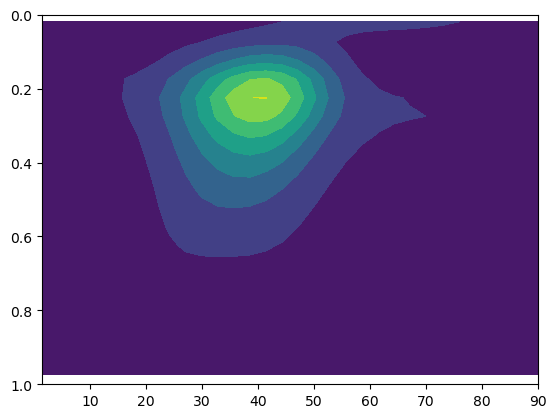

In [221]:
plt.figure()
plt.contourf(yy[:,32:], sigma_mean2[:,:32], np.nanmean(EKE[5,:,:,32:], axis=(0,3)))
plt.ylim([1,0])

In [222]:
check_days_length = int(end - start)

EOF1_all = np.zeros(((int(total_pr), 20, 32)))
EOF2_all = np.zeros(((int(total_pr), 20, 32)))

PC1_all = np.zeros((int(total_pr), total_day))
PC2_all = np.zeros((int(total_pr), total_day))

judge = total_day - (u.shape[2] * u.shape[3])/2
if judge >0:
    n_component = int((u.shape[2] * u.shape[3])/2)
else:
    n_component = total_day
    
explain_all = np.zeros((int(total_pr), 150))

interpolation_times = 10
a = 0

for pr in range(pr_start, pr_to, pr_leap):
    sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
    sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
    yy, sigma_mean2 = np.meshgrid(y, sigma_onlyz)

    # Step1. give value u 
    u_zy = np.nanmean(EKE[a,:,:,32:,:], axis=3) #[time, z, y] 

    u_nhalf_w = np.zeros(u_zy.shape)
    for i in range(np.shape(u_zy)[0]): 
        for j in range(np.shape(u_zy)[1]):
                u_nhalf_w[i,j,:] = u_zy[i,j,:] * (cy[32:])**0.5
                
    u_final = np.reshape(u_nhalf_w[:,:,:], (u_nhalf_w.shape[0], u_nhalf_w.shape[1]*u_nhalf_w.shape[2]))

    single_EOF = EOF((u_final,), n_components=20*32, field="1D")
    single_EOF.get()
    
    # Step 3: PC / PC_std and EOF * PC_std
    PCs    = single_EOF.PC[0,:]
    PC2s   = single_EOF.PC[1,:]
    
    EOFs   = single_EOF.EOF[0,:]
    EOF2s  = single_EOF.EOF[1,:]
    
    EOF1_all[a,:] = np.reshape(EOFs,  (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))
    EOF2_all[a,:] = np.reshape(EOF2s, (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))

    PC1_all[a,:] = PCs
    PC2_all[a,:] = PC2s
    print(a)
    a += 1
    
print("done")

0
1
2
3
4
5
done


(1.0, 0.0)

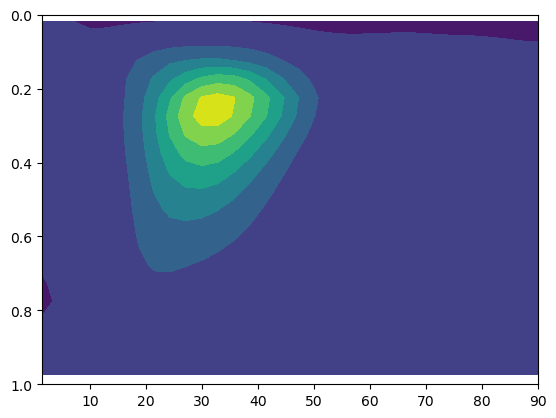

In [223]:
# checking EOF1 and EOF2 are correct or not
plt.figure()
plt.contourf(yy[:,32:], sigma_mean2[:,32:], EOF1_all[0])
plt.ylim([1,0])

In [224]:
PC1_all_new = np.zeros((int(total_pr), int(total_day)))

for i in range(int(total_pr)):
    print(i)
    PC1_all_new[i,:] = (PC1_all[i,:] - PC1_all[i,:].mean()) / PC1_all[i,:].std()

print(PC1_all_new.std())
print(PC1_all_new.mean())

0
1
2
3
4
5
1.0
-2.0230730670947298e-17


In [225]:
lg = 80
N = int(lg/2)
judge = total_day / lg
print(round(judge))
if round(judge) == total_day / lg:
    all_window = np.zeros(((int(total_pr),int(total_day/(lg)), int(lg/2))))
else:
    all_window = np.zeros(((int(total_pr),round(judge), int(lg))))
    


30



## Explained variance by specific frequency 
##     Physically, I want to calculate the covariance in every frequency 
##     so I need to decompose y by Fourier transform first, then calculate covariance, then plot it on power spectrum.

###     Step 1:
###     fft package will return (coefficient * Number of grids), coefficient: ak is a complex number, which contain real number and imaginary
###     So ak = fft(y) / len(y)
###     Step 2:
###     $$ a_k = {1 \over 2π} {\int_{-π}^{π}} f(x) {e^{-2πixk}} dx $$
###     $$ b_k = {1 \over  π} {\int_{-π}^{π}} f(x) cos⁡(kx)      dx $$
###     $$ c_k = {1 \over  π} {\int_{-π}^{π}} f(x) sin⁡(kx)      dx $$
###     Base on above 3 equations 
###     $$ a_k = {1\over 2}(b_k - ic_k)$$

###     Step 3:
###     I want to plot power spectrum, so I need fftfreq(len(y)) as x-coordinate
###     so return freq[:size], sp[:size]
###     (fft and fftfreq calculate negative freq, so I create size variable to determine the 0 to positive freq.)

In [226]:
# Calculate power spectrum
def calc_power_spectrum(signal, chunk_size = 80):
    # Since fft would calculate negative frequency, 
    # size variable determine the length of return fft
    size = np.floor(chunk_size / 2).astype(int)

    # fft return coefficient * number of grid
    ak   = fft(signal) / len(signal)
    freq = fftfreq(len(signal))

    # Base on the equations below
    ak[:size]      *= 2
    ak.imag[:size] *= -1
    sp   =  (ak.real**2 + ak.imag**2)
    return (freq[:size]), sp[:size]

In [227]:
# Calculate every window in i loop
a = 0
chunk_size  = 80
sp_list = np.zeros(np.floor(chunk_size /2).astype(int))
for pr in range(pr_start, pr_to, pr_leap):
    for i in range(0, int(total_day/chunk_size), 1):
        freq, sp = calc_power_spectrum(PC1_all_new[a,i*chunk_size:(i+1)*chunk_size])
        sp_list[:] = sp / sp.sum()
        all_window[a,i,:] = sp_list 
    a += 1

In [228]:
all_window.shape

(6, 30, 40)

In [229]:
# Create Nick 6 diferent colors of the PRs
import matplotlib.colors as colors
import matplotlib as mpl

rgb=([112,115,115])
rgb=np.array(rgb)/255.0
icmap=colors.ListedColormap(rgb,name='my_color')
cmap=mpl.cm.viridis

cmap_color=icmap  
colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255

coefficient = 1.0


(-0.005, 0.25)

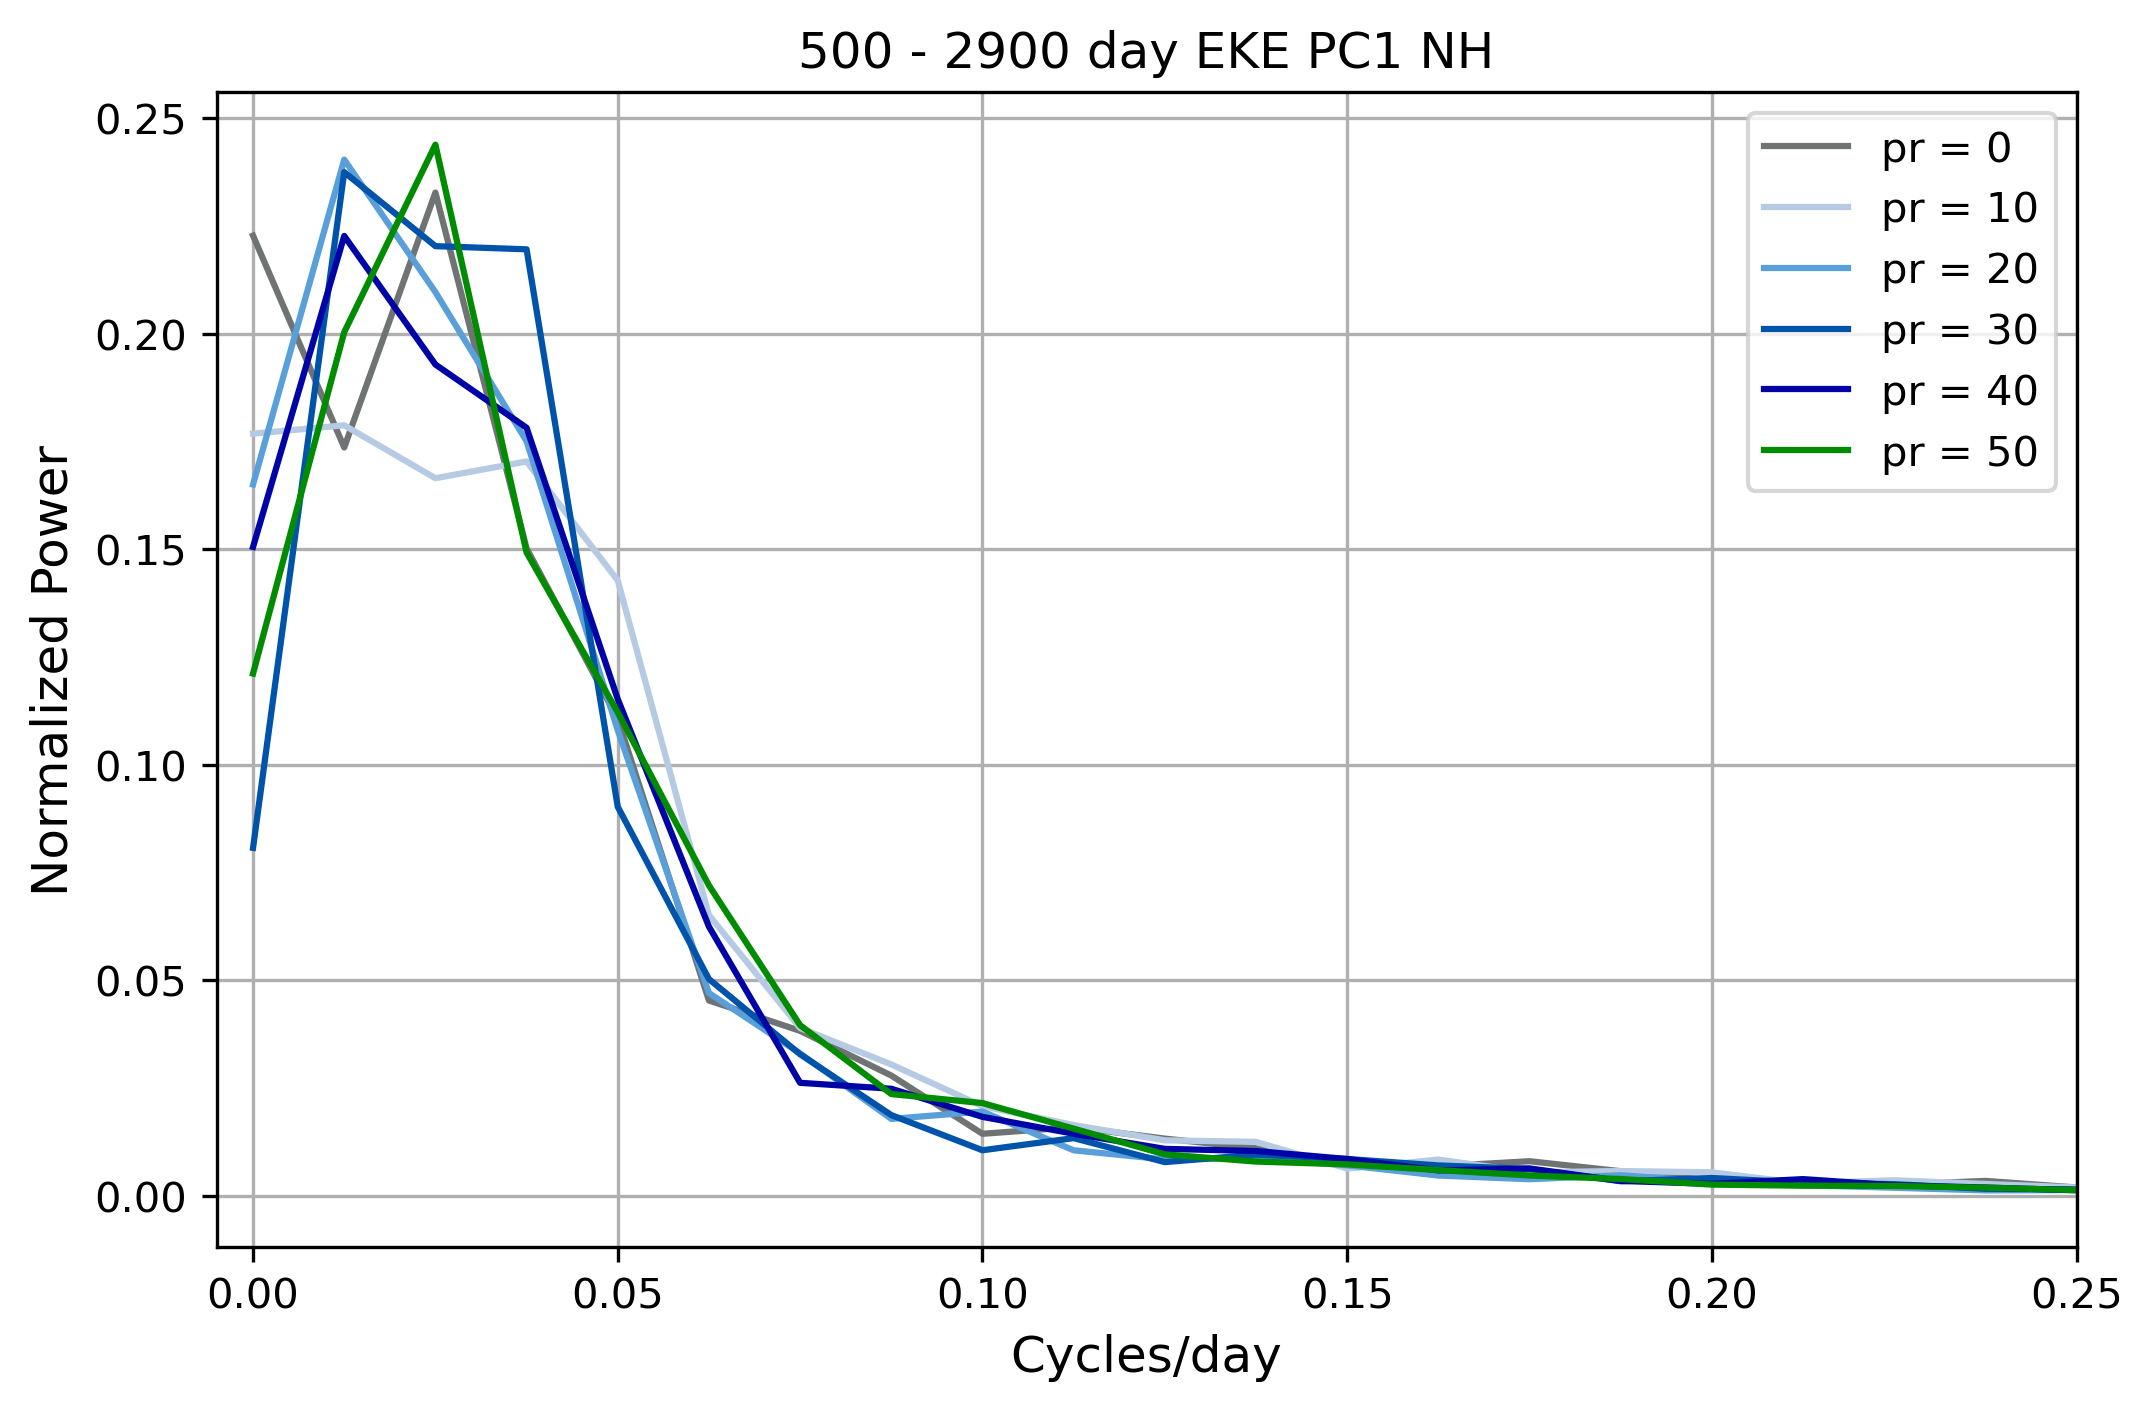

In [231]:
########################################################################
a = 0

# plot
fig,ax = plt.subplots(1,figsize=(8,5), dpi=300.)
for pr in range(pr_start, pr_to, pr_leap):
    # first mean all windows
    mean_all_window = np.nanmean(all_window[a,:,:], axis=0)

    # calculate area for normalized powered
    area = np.trapz(mean_all_window) 

    # then plot normalized power spectrum 
    ax.plot(freq,  mean_all_window[:]/area, label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    a+=1
ax.set_xlabel('Cycles/day',fontsize=12)
ax.set_ylabel('Normalized Power',fontsize=12)
ax.set_title("500 - 2900 day EKE PC1 NH")
print("coefficient =", np.sum(np.nanmean(all_window[-1,:,:], axis=0)))
ax.grid()
plt.xticks(np.arange(0,0.55,0.05))
plt.legend()
plt.xlim([-0.005,0.25])



/tmp/ipykernel_2912881/1941455187.py:3: RuntimeWarning: invalid value encountered in sqrt
  sigma =  np.sqrt(1 - a**2)
/tmp/ipykernel_2912881/4268014395.py:6: RuntimeWarning: invalid value encountered in sqrt
  sigma       = np.sqrt(1 - a**2)


-14.671212484253608


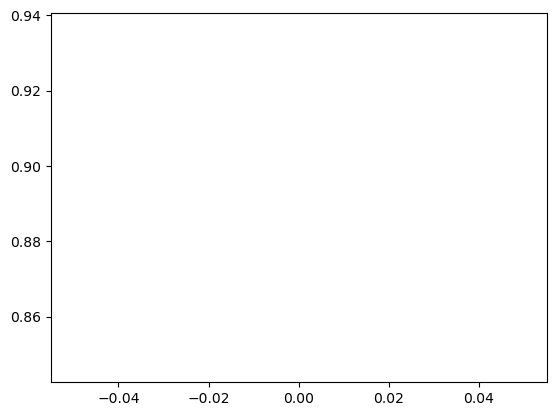

In [239]:
sigma_mean2.shape

(20, 64)

Text(0.5, 1.0, 'Shading: EOF, contour:u')

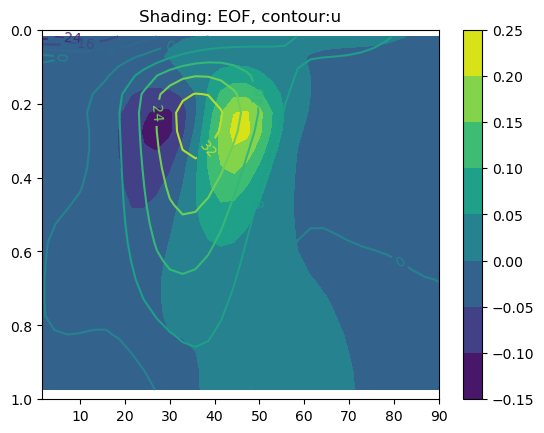

In [240]:
plt.figure()
CS = plt.contourf(yy[:,32:], sigma_mean2[:,32:], EOF2_all[0])
plt.colorbar(CS)
CS2 = plt.contour(yy[:,32:], sigma_mean2[:,32:], np.nanmean(u[0,:,:,32:], axis=(0,3)))
plt.clabel(CS2)
plt.ylim([1,0])
plt.title("Shading: EOF, contour:u")

In [234]:
mean_all_window / np.nanmax(mean_all_window)

array([0.49677897, 0.82160268, 1.        , 0.61191901, 0.4598999 ,
       0.29518779, 0.1622239 , 0.09668289, 0.08810562, 0.06382346,
       0.03931542, 0.03247299, 0.0298035 , 0.02436127, 0.01922784,
       0.01587761, 0.01055319, 0.00950901, 0.00929501, 0.00762163,
       0.00532391, 0.00563773, 0.00515791, 0.00438432, 0.00353053,
       0.00457595, 0.00241382, 0.00301701, 0.00351372, 0.00155286,
       0.00231735, 0.00200123, 0.00193502, 0.00142768, 0.00124164,
       0.00177019, 0.00158139, 0.00124301, 0.00136824, 0.00156211])

In [235]:
print(xx/80)
print(freq)

[0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125  0.1375 0.15   0.1625 0.175  0.1875 0.2    0.2125 0.225  0.2375
 0.25   0.2625 0.275  0.2875 0.3    0.3125 0.325  0.3375 0.35   0.3625
 0.375  0.3875 0.4    0.4125 0.425  0.4375 0.45   0.4625 0.475  0.4875]
[0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125  0.1375 0.15   0.1625 0.175  0.1875 0.2    0.2125 0.225  0.2375
 0.25   0.2625 0.275  0.2875 0.3    0.3125 0.325  0.3375 0.35   0.3625
 0.375  0.3875 0.4    0.4125 0.425  0.4375 0.45   0.4625 0.475  0.4875]


# try U

In [241]:
check_days_length = int(end - start)

EOF1_all = np.zeros(((int(total_pr), 20, 32)))
EOF2_all = np.zeros(((int(total_pr), 20, 32)))

PC1_all = np.zeros((int(total_pr), total_day))
PC2_all = np.zeros((int(total_pr), total_day))

judge = total_day - (u.shape[2] * u.shape[3])/2
if judge >0:
    n_component = int((u.shape[2] * u.shape[3])/2)
else:
    n_component = total_day
explain_all = np.zeros((int(total_pr), 150))

interpolation_times = 10
a = 0

yys           = np.linspace(0, 90, 32*interpolation_times)
sigma_mean2s  = np.linspace(0,  1, 20*interpolation_times)

cyy           = np.cos(np.deg2rad(yys))
y             = np.linspace(0,90,32)
cy            = np.cos(np.deg2rad(y))
for pr in range(pr_start, pr_to, pr_leap):
    sigma_mean      = np.nanmean(p[a,-check_days_length:,:,:,:]/ps[a,-check_days_length:,:,:,:], axis=(0,3))
    sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
    yy, sigma_mean2 = np.meshgrid(y, sigma_onlyz)

    # y_nhalf = np.linspace(-90,0,32)
    # yy_nhalf, sigma_mean2_nhalf = np.meshgrid(y_nhalf,sigma_onlyz)

    # Step1. interpolation
    u_zy = np.nanmean(u[a,:,:,32:,:], axis=3) #[time, z, y] 
    # u_zy = np.nanmean(EKE[a,:,:,:,:], axis=3)
    # u_zy = np.nanmean(VT[a,:,:,:,:], axis=3)
    
    # u_zy_thin = np.zeros(((u_zy.shape[0], 20*interpolation_times, 32*interpolation_times)))

    # for i in range(u_zy.shape[0]):
    #     interp_spline          = RectBivariateSpline(sigma_onlyz, y[32:], u_zy[i, :,32:])
    #     u_zy_thin[i,:,:]       = interp_spline(sigma_mean2s, yys) # (time, 200, 320)

    # u_nhalf = u[:,:,:,:,:] 
    u_nhalf_w = np.zeros(u_zy.shape)
    for i in range(np.shape(u_zy)[0]): 
        for j in range(np.shape(u_zy)[1]):
                u_nhalf_w[i,j,:] = u_zy[i,j,:] * (cy[:])**0.5
                
    # biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[a])
    # biggest_u_y, biggest_u_y_idx = find_nearest(yys         , value=y_biggest_all[a])
    
    # print(biggest_u_z_idx)
    # print(biggest_u_y_idx)
    
    u_final =  np.reshape(u_nhalf_w[:,:,:], (u_nhalf_w.shape[0], u_nhalf_w.shape[1]*u_nhalf_w.shape[2]))

    single_EOF = EOF((u_final[:,:],), n_components=20*32, field="1D")
    single_EOF.get()
    # Step 3: PC / PC_std and EOF * PC_std
    PCs    = single_EOF.PC[0,:]
    PC2s   = single_EOF.PC[1,:]
    
    EOFs   = single_EOF.EOF[0,:]
    EOF2s  = single_EOF.EOF[1,:]
    
    EOF1_all[a,:,:] = np.reshape(EOFs,  (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))
    EOF2_all[a,:,:] = np.reshape(EOF2s, (u_nhalf_w.shape[1], u_nhalf_w.shape[2]))

    PC1_all[a,:] = PCs
    PC2_all[a,:] = PC2s
    
    a += 1
    
# fig.tight_layout()
print("done")
# plt.savefig("check_U_EOF.png", dpi=300., bbox_inches='tight')
# plt.show()

KeyboardInterrupt: 

In [150]:
EOF2_all.shape

(6, 20, 32)

Text(0.5, 1.0, 'Shading: u EOF, contour:u')

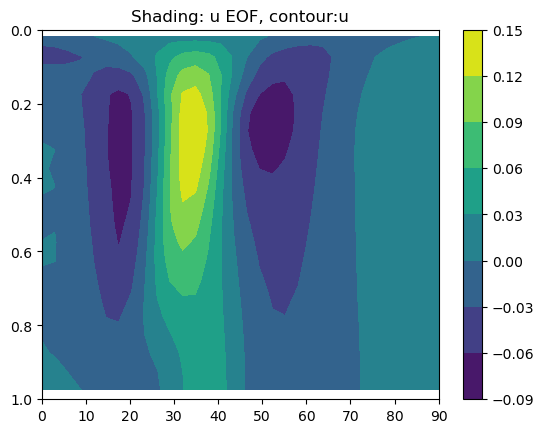

In [151]:
plt.figure()
CS = plt.contourf(yy, sigma_mean2, EOF2_all[1])
plt.colorbar(CS)
#CS2 = plt.contour(yy[:,32:], sigma_mean2[:,32:], np.nanmean(u[0,:,:,32:], axis=(0,3)))
#plt.clabel(CS2)
plt.ylim([1,0])
plt.title("Shading: u EOF, contour:u")

In [152]:
PC2_all_new = np.zeros((int(total_pr), int(total_day)))

for i in range(int(total_pr)):
    print(i)
    PC2_all_new[i,:] = (PC2_all[i,:] - PC2_all[i,:].mean()) / PC2_all[i,:].std()

print(PC2_all_new.std())
print(PC2_all_new.mean())

0
1
2
3
4
5
1.0
-3.3948152930760344e-16


In [153]:
lg = 80
N = int(lg/2)
judge = total_day / lg
print(round(judge))
if round(judge) == total_day / lg:
    all_window = np.zeros(((int(total_pr),int(total_day/(lg)), int(lg/2))))
else:
    all_window = np.zeros(((int(total_pr),round(judge), int(lg))))
    
print(int(total_day/lg))
    
print(all_window.shape)

30
30
(6, 30, 40)


0.8812214621751474
0.893450542693087
0.8905885205295646
0.9062177617921774
0.8955174165152553
0.9183710776365763
coefficient = 1.0


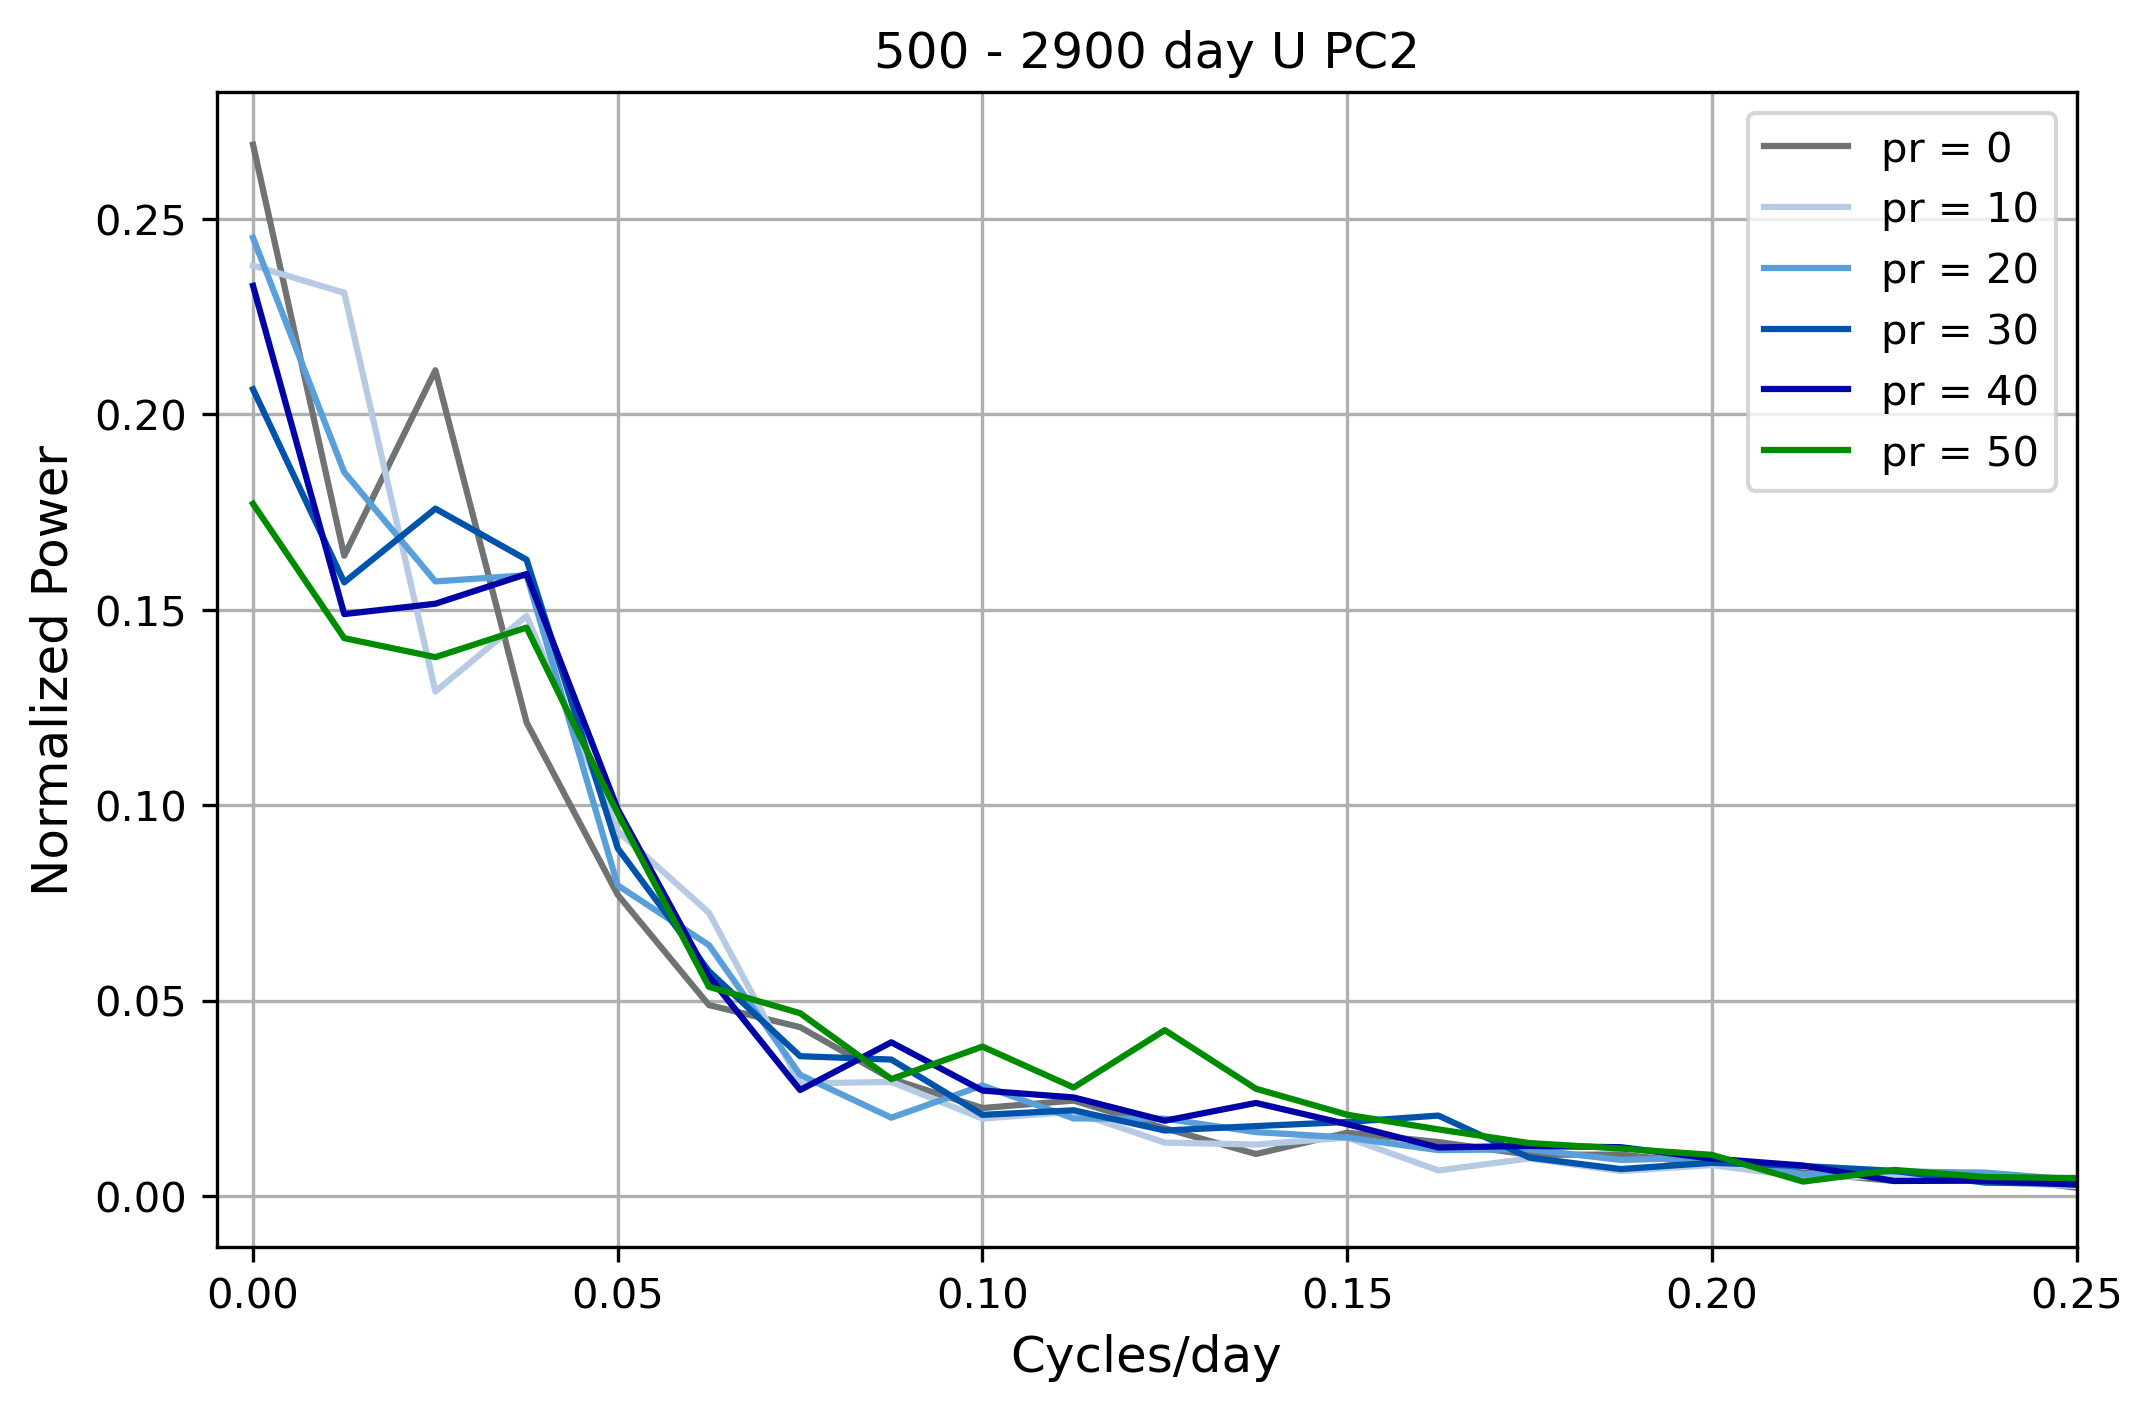

In [154]:

#######################################################################################
#a = 0
#chunk_size = 80

#sp_list = np.zeros((len(PC2_all_new), np.floor(chunk_size / 2).astype(int)))

#freq, sp = calc_power_spectrum(PC2_all_new)
#sp_list[a] = sp / sp.sum()
#####################################################################################
a = 0
chunk_size = 80
sp_list = np.zeros(np.floor(chunk_size /2).astype(int))
for pr in range(pr_start, pr_to, pr_leap):
    for i in range(0, 30,1):
        freq, sp = calc_power_spectrum(PC2_all_new[a,i*80:(i+1)*80])
        sp_list[:] = sp / sp.sum()
        all_window[a,i,:] = sp_list 
        # plt.plot(sp_list, label=f"{i}th window")
    a += 1
# plt.legend()
# plt.xlabel('Wavenumbers',fontsize=12)
# plt.ylabel('Magnitudes',fontsize=12)
# plt.title("80 days window PC2 u fft")
########################################################################
a = 0
fig, ax = plt.subplots(1,figsize=(8,5),dpi=300.)

for pr in range(pr_start, pr_to, pr_leap):
    mean_all_window = np.nanmean(all_window[a,:,:], axis=0)
    
    area = np.trapz(mean_all_window)
    print(area)
    ax.plot(xx/80,  mean_all_window[:]/area, label=f"pr = {a*pr_leap}", color=colors[int(pr/pr_leap)])
    a += 1
ax.set_xlabel('Cycles/day',fontsize=12)
ax.set_ylabel('Normalized Power',fontsize=12)
# plt.title("fft (500-2900 day divided into 80 days window) -> 30 PC1s -> covariance \n-> average these 30 windows")
ax.set_title(r"500 - 2900 day U PC2")
print("coefficient =", np.sum(np.nanmean(all_window[-1,:,:], axis=0)))
ax.grid()
ax.legend()
ax.set_xticks(np.arange(0,0.55,0.05))
plt.xlim([-0.005,0.25])

plt.savefig("500 - 2900 day Red noise U.png", dpi=300, bbox_inches='tight')
